Importando bibliotecas 


In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:


# Ler o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/Univesp-PI-2022/projeto-integrador-4/main/dados/censo1.csv',sep=";")

# Exibir o DataFrame resultante
df.head()


,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,"-23,4962781999999","-46,391831",10/25/21,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,"-23,5225168","-46,522712",10/25/21,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,"-23,5232932","-46,6549845",11/3/21,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,"-23,7430783949666","-46,6929477602377",10/27/21,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,"-23,5251419","-46,6255225",11/9/21,Mooca,Pari


In [3]:
df.count()

ID                              31884
Situação de rua                 31884
Onde dormiu ontem               31884
Tempo de permanência            31884
Sexo                            31884
Identifica com o sexo nasceu    31884
Idade                           31884
Faixa de idade                  31884
Classificação de idade          31884
Cor_Raça_Etnia                  31884
Parentes no CA                  31884
Tempo na situação               31884
Tipo de ponto                   31884
Presença_Moradia_Improvisada    31884
Criança_acomp_Adulto            31884
Criança_Sozinha                 31884
Latitude                        31717
Longitude                       31717
Data                            31884
Subprefeitura                   31884
Distrito                        31884
dtype: int64

### Mostrando os lugares ###

In [4]:
df[['Latitude', 'Longitude']].head()

,Latitude,Longitude
0,"-23,4962781999999","-46,391831"
1,"-23,5225168","-46,522712"
2,"-23,5232932","-46,6549845"
3,"-23,7430783949666","-46,6929477602377"
4,"-23,5251419","-46,6255225"


In [5]:
df['Latitude'] = df['Latitude'].apply(lambda x: float(str(x).replace(',', '.')))
df['Longitude'] = df['Longitude'].apply(lambda x: float(str(x).replace(',', '.')))


In [6]:
df[['Latitude', 'Longitude']].head()

,Latitude,Longitude
0,-23.496278,-46.391831
1,-23.522517,-46.522712
2,-23.523293,-46.654984
3,-23.743078,-46.692948
4,-23.525142,-46.625523


In [7]:
df['Latitude'].count()

31717

In [8]:
df['Longitude'].count()

31717

### Removendo Nan ###

In [9]:
df.dropna(subset=['Latitude'], inplace=True)


In [10]:
df.dropna(subset=['Longitude'], inplace=True)

In [11]:
df.count()

ID                              31717
Situação de rua                 31717
Onde dormiu ontem               31717
Tempo de permanência            31717
Sexo                            31717
Identifica com o sexo nasceu    31717
Idade                           31717
Faixa de idade                  31717
Classificação de idade          31717
Cor_Raça_Etnia                  31717
Parentes no CA                  31717
Tempo na situação               31717
Tipo de ponto                   31717
Presença_Moradia_Improvisada    31717
Criança_acomp_Adulto            31717
Criança_Sozinha                 31717
Latitude                        31717
Longitude                       31717
Data                            31717
Subprefeitura                   31717
Distrito                        31717
dtype: int64

In [12]:
df['Latitude'].isna().sum()

0

In [13]:
df['Longitude'].isna().sum()

0

In [14]:
df = df.sample(n=10000, random_state=42)

In [ ]:
df.count()

ID                              10000
Situação de rua                 10000
Onde dormiu ontem               10000
Tempo de permanência            10000
Sexo                            10000
Identifica com o sexo nasceu    10000
Idade                           10000
Faixa de idade                  10000
Classificação de idade          10000
Cor_Raça_Etnia                  10000
Parentes no CA                  10000
Tempo na situação               10000
Tipo de ponto                   10000
Presença_Moradia_Improvisada    10000
Criança_acomp_Adulto            10000
Criança_Sozinha                 10000
Latitude                        10000
Longitude                       10000
Data                            10000
Subprefeitura                   10000
Distrito                        10000
dtype: int64

### Modelo de machine learning que mostra clusters de concentracao usando K-Means ###


In [15]:
df[['Latitude', 'Longitude']]

,Latitude,Longitude
31212,-23.627176,-46.738046
11889,-23.510752,-46.618353
31686,-23.563061,-46.645435
7610,-23.549240,-46.641932
19575,-23.645113,-46.733419
...,...,...
4430,-23.542773,-46.591922
20998,-23.558310,-46.645315
29167,-23.519422,-46.595125
23207,-23.549924,-46.611778


In [16]:

from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


# Determinar o valor de K usando o método elbow
distortions = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df[['Latitude', 'Longitude']])
    distortions.append(model.inertia_)




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

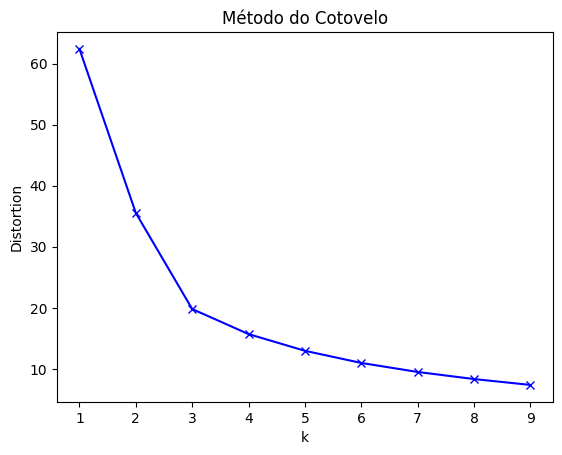

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


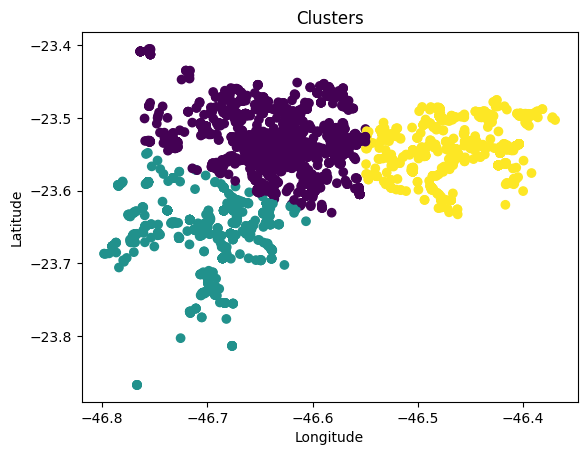

In [19]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método do Cotovelo')
plt.show()

# Executar o algoritmo K-Means com K = 3
model = KMeans(n_clusters=3)
model.fit(df[['Latitude', 'Longitude']])

# Visualizar os clusters
labels = model.predict(df[['Latitude', 'Longitude']])
plt.scatter(df['Longitude'], df['Latitude'], c=labels)
plt.title('Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()